In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

In [2]:
plt.style.use('seaborn-notebook')

## Exercise 5.1

Daily electricity demand for Victoria, Australia, during 2014 is contained in elecdaily. The data for the first 20 days can be obtained as follows

In [42]:
elecdaily = pd.read_csv('data/elecdaily.csv', index_col=0)
daily20 = elecdaily.head(20).copy()
daily20.head()

,Demand,WorkDay,Temperature
1,174.896295,0,26.0
2,188.590935,1,23.0
3,188.916891,1,22.2
4,173.814244,0,20.3
5,169.515175,0,26.1


    a. Plot the data and find the regression model for Demand with temperature as an explanatory variable. Why is there a positive relationship?

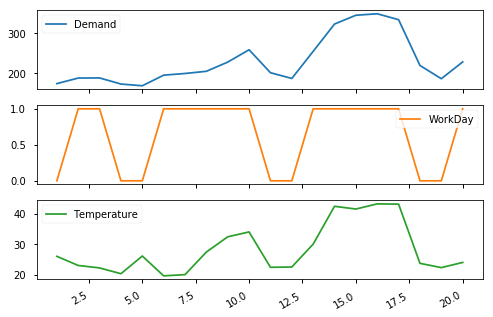

In [9]:
axs = daily20.plot(subplots=True)

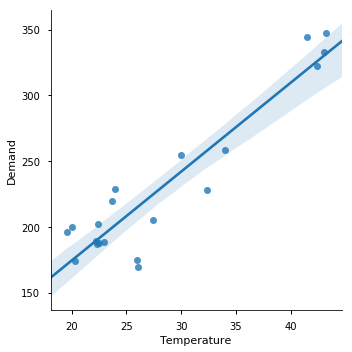

In [10]:
sns.lmplot('Temperature', 'Demand', data=daily20)

The above plot is depicts the variation in electricity demand and temerature for the first 20 days. It may be assumed that the positive relation between Demand and Temperature could be owing to increased electricity consumption involved in cooling the premises during summer.

    b. Produce a residual plot. Is the model adequate? Are there any outliers or influential observations?

In [47]:
from statsmodels.formula.api import ols
from statsmodels.graphics import regressionplots, tsaplots

In [20]:
model = ols('Demand ~ Temperature', data=daily20).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Demand   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     122.1
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           1.88e-09
Time:                        22:39:09   Log-Likelihood:                -89.149
No. Observations:                  20   AIC:                             182.3
Df Residuals:                      18   BIC:                             184.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      39.2117     17.992      2.179      0.043       1.413      77.011
Temperature     6.7572      0.611     11.052      0.000       5.473       8.042
==============================================================================
Omnibus:                        1.909   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.468
Skew:                          -0.637   Prob(JB):                        0.480
Kurtosis:                       2.624   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\430014183\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


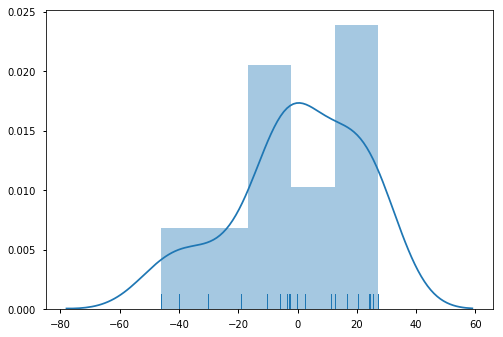

In [46]:
sns.distplot(model.resid, rug=True)

In [43]:
daily20['resid'] = model.resid

Text(0.5,1,'Model residuals at time')

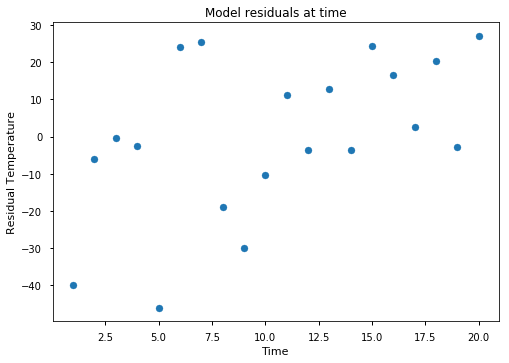

In [68]:
fig, ax = plt.subplots()
plt.scatter(x=daily20.index.values, y=daily20.resid)
ax.set_ylabel('Residual Temperature')
ax.set_xlabel('Time')
ax.set_title('Model residuals at time')

There is potentially atleast one outlier at the first timestep (day) where the residual is -40

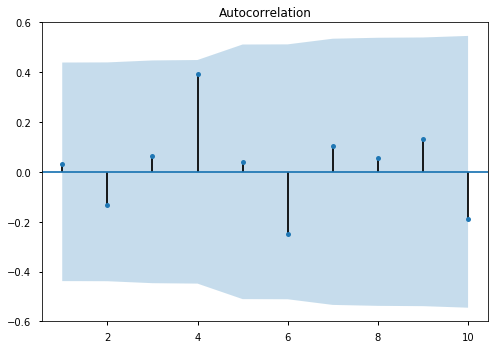

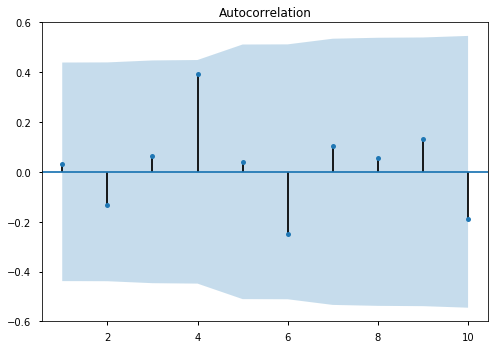

In [53]:
tsaplots.plot_acf(model.resid, lags=10, zero=False)

    c. Use the model to forecast the electricity demand that you would expect for the next day if the maximum temperature was 15∘ and compare it with the forecast if the with maximum temperature was 35∘. Do you believe these forecasts? 

In [73]:
model.predict(exog=dict(Temperature=[15, 35]))

0    140.570088
1    275.714579
dtype: float64

Demand of 275 units at 35 degree celcius is more realistic. 140 units at 15 degree celcius is difficult to believe since the regression model was not fit in this range of data.

    d. Give prediction intervals for your forecasts.

 
    e. Plot Demand vs Temperature for all of the available data in elecdaily. What does this say about your model? 